In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs

In [2]:
USER_AGENT = "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"
# US english
LANGUAGE = "en-US,en;q=0.5"
def get_soup(url):
    """Constructs and returns a soup using the HTML content of `url` passed"""
    # initialize a session
    session = requests.Session()
    # set the User-Agent as a regular browser
    session.headers['User-Agent'] = USER_AGENT
    # request for english content (optional)
    session.headers['Accept-Language'] = LANGUAGE
    session.headers['Content-Language'] = LANGUAGE
    
    # make the request forcing to get decimal numbers instead of fraction
    html = session.get(url,  cookies={'odds_type': 'decimal'})
    # return the soup
    return bs(html.content, "html.parser")

def get_all_tables(soup):
    """Extracts and returns all tables in a soup object"""
    return soup.find_all("tbody")

In [3]:
# function that gets all URLs from each match
def getAllUrls():
    urls_code = """
    <ul class="item-list left-col scroller"><li class="item-list-header beta-body bold">Euro 2020 Matches
            </li><li><a class="select-item beta-callout" href="/football/euro-2020/turkey-v-italy/winner" title="Turkey v Italy" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Turkey v Italy</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/wales-v-switzerland/winner" title="Wales v Switzerland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Wales v Switzerland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/denmark-v-finland/winner" title="Denmark v Finland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Denmark v Finland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/belgium-v-russia/winner" title="Belgium v Russia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Belgium v Russia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/england-v-croatia/winner" title="England v Croatia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">England v Croatia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/austria-v-north-macedonia/winner" title="Austria v North Macedonia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Austria v North Macedonia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/netherlands-v-ukraine/winner" title="Netherlands v Ukraine" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Netherlands v Ukraine</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/scotland-v-czech-republic/winner" title="Scotland v Czech Republic" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Scotland v Czech Republic</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/poland-v-slovakia/winner" title="Poland v Slovakia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Poland v Slovakia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/spain-v-sweden/winner" title="Spain v Sweden" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Spain v Sweden</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/hungary-v-portugal/winner" title="Hungary v Portugal" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Hungary v Portugal</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/france-v-germany/winner" title="France v Germany" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">France v Germany</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/finland-v-russia/winner" title="Finland v Russia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Finland v Russia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/turkey-v-wales/winner" title="Turkey v Wales" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Turkey v Wales</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/italy-v-switzerland/winner" title="Italy v Switzerland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Italy v Switzerland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/ukraine-v-north-macedonia/winner" title="Ukraine v North Macedonia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Ukraine v North Macedonia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/denmark-v-belgium/winner" title="Denmark v Belgium" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Denmark v Belgium</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/netherlands-v-austria/winner" title="Netherlands v Austria" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Netherlands v Austria</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/sweden-v-slovakia/winner" title="Sweden v Slovakia" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Sweden v Slovakia</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/croatia-v-czech-republic/winner" title="Croatia v Czech Republic" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Croatia v Czech Republic</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/england-v-scotland/winner" title="England v Scotland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">England v Scotland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/hungary-v-france/winner" title="Hungary v France" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Hungary v France</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/portugal-v-germany/winner" title="Portugal v Germany" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Portugal v Germany</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/spain-v-poland/winner" title="Spain v Poland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Spain v Poland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/italy-v-wales/winner" title="Italy v Wales" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Italy v Wales</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/switzerland-v-turkey/winner" title="Switzerland v Turkey" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Switzerland v Turkey</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/ukraine-v-austria/winner" title="Ukraine v Austria" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Ukraine v Austria</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/north-macedonia-v-netherlands/winner" title="North Macedonia v Netherlands" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">North Macedonia v Netherlands</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/finland-v-belgium/winner" title="Finland v Belgium" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Finland v Belgium</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/russia-v-denmark/winner" title="Russia v Denmark" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Russia v Denmark</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/croatia-v-scotland/winner" title="Croatia v Scotland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Croatia v Scotland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/czech-republic-v-england/winner" title="Czech Republic v England" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Czech Republic v England</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/slovakia-v-spain/winner" title="Slovakia v Spain" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Slovakia v Spain</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/sweden-v-poland/winner" title="Sweden v Poland" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Sweden v Poland</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/germany-v-hungary/winner" title="Germany v Hungary" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Germany v Hungary</a></li><li><a class="select-item beta-callout" href="/football/euro-2020/portugal-v-france/winner" title="Portugal v France" data-ng-click="MainController.mainNav.showSelectMatchDropDown = 'loading'">Portugal v France</a></li></ul>
    """
    base = 'https://www.oddschecker.com/'

    urls =urls_code.replace('href=', "\nhref=")
    urls = [base + a[6:a.find("/winner")+7] for a in urls.split('\n') if 'winner' in a and ' v ' in a]

    return urls

In [4]:
def getTableFormated(url):
    soup = get_soup(url)
    to_remove = ['spanclass', 'tdclass', 'trclass', '!--', 'aclass', 'span',
                 'tbodyid', 'divclass', 'tbody', 'div']

    tables = get_all_tables(soup)
    tables = str(tables).replace(" ","").replace('\t','')
    tables = tables.replace('<', '\n<')
    tables = [a for a in tables.split('\n') if not any([remove in a for remove in to_remove])]
    tables = [a[a.find('title="Add')+len('title="Add') :].replace('tobetslip"','') 
              if 'add"title=' in a else a for a in tables]
    tables = "".join(tables)
    tables = "".join([a for a in tables.split('\n') if not any([remove in a for remove in to_remove])])

    tables = tables.replace('</tr>', '\n')
    tables = tables.replace('</p></td><p>',';')

    tables = tables.replace('</td></td>',';;')

    to_remove = ['</td>', '<td>', '</a>', '<a>', '<p>','</p>', '<tr>', '[']
    for r in to_remove: tables = tables.replace(r,'')

    tables = tables.replace('</tr>', '\n')
    return tables

In [5]:
allURLs = getAllUrls()
allURLs

['https://www.oddschecker.com//football/euro-2020/turkey-v-italy/winner',
 'https://www.oddschecker.com//football/euro-2020/wales-v-switzerland/winner',
 'https://www.oddschecker.com//football/euro-2020/denmark-v-finland/winner',
 'https://www.oddschecker.com//football/euro-2020/belgium-v-russia/winner',
 'https://www.oddschecker.com//football/euro-2020/england-v-croatia/winner',
 'https://www.oddschecker.com//football/euro-2020/austria-v-north-macedonia/winner',
 'https://www.oddschecker.com//football/euro-2020/netherlands-v-ukraine/winner',
 'https://www.oddschecker.com//football/euro-2020/scotland-v-czech-republic/winner',
 'https://www.oddschecker.com//football/euro-2020/poland-v-slovakia/winner',
 'https://www.oddschecker.com//football/euro-2020/spain-v-sweden/winner',
 'https://www.oddschecker.com//football/euro-2020/hungary-v-portugal/winner',
 'https://www.oddschecker.com//football/euro-2020/france-v-germany/winner',
 'https://www.oddschecker.com//football/euro-2020/finland-v-r

In [14]:
oddsDf = pd.DataFrame()

for i in range(len(allURLs)):
    print(f'Processing...{allURLs[i]}')
    matchodds = getTableFormated(allURLs[i])
    winner = [a.split('>')[0] for a in matchodds.split('\n') if '>' in a]
    odds = [a.split('>')[1] for a in matchodds.split('\n') if '>' in a]
    match = winner[0] + 'VS' + winner[-1]

    arrays = np.array([[match, match, match], winner, [allURLs[i], allURLs[i], allURLs[i]], odds]).T
    df_match = pd.DataFrame(data=arrays,columns=['match','second','urls','odds'])
    
    oddsDf = pd.concat([oddsDf, df_match], axis=0)
    

Processing...https://www.oddschecker.com//football/euro-2020/turkey-v-italy/winner
Processing...https://www.oddschecker.com//football/euro-2020/wales-v-switzerland/winner
Processing...https://www.oddschecker.com//football/euro-2020/denmark-v-finland/winner
Processing...https://www.oddschecker.com//football/euro-2020/belgium-v-russia/winner
Processing...https://www.oddschecker.com//football/euro-2020/england-v-croatia/winner
Processing...https://www.oddschecker.com//football/euro-2020/austria-v-north-macedonia/winner
Processing...https://www.oddschecker.com//football/euro-2020/netherlands-v-ukraine/winner
Processing...https://www.oddschecker.com//football/euro-2020/scotland-v-czech-republic/winner
Processing...https://www.oddschecker.com//football/euro-2020/poland-v-slovakia/winner
Processing...https://www.oddschecker.com//football/euro-2020/spain-v-sweden/winner
Processing...https://www.oddschecker.com//football/euro-2020/hungary-v-portugal/winner
Processing...https://www.oddschecker.c

In [15]:
oddsDf

,match,second,urls,odds
0,ItalyVSTurkey,Italy,https://www.oddschecker.com//football/euro-202...,1.45;1.53;1.5;1.53;1.53;1.5;1.5;1.6;1.55;1.57;...
1,ItalyVSTurkey,Draw,https://www.oddschecker.com//football/euro-202...,4;3.8;3.75;3.7;3.75;3.75;4;3.65;3.75;3.75;3.95...
2,ItalyVSTurkey,Turkey,https://www.oddschecker.com//football/euro-202...,8;7;7;8;7;7;7;7;7.25;7.5;8;7;7;7;7.25;;7.5;6.6...
0,SwitzerlandVSWales,Switzerland,https://www.oddschecker.com//football/euro-202...,2.2;2.2;2.2;2.25;2.25;2.2;2.25;2.2;2.25;2.25;2...
1,SwitzerlandVSWales,Draw,https://www.oddschecker.com//football/euro-202...,3;3;3;2.9;3;3;3.1;3.1;3;3;3.15;3;3;3;3;;3.04;2...
...,...,...,...,...
1,GermanyVSHungary,Draw,https://www.oddschecker.com//football/euro-202...,5.5;6.25;6;5.8;6;6;;5.7;6.5;6.5;6.6;6.5;5.5;6....
2,GermanyVSHungary,Hungary,https://www.oddschecker.com//football/euro-202...,9.5;12;12;13;11.5;12;;13.5;11;12;11;11;11;11;1...
0,FranceVSPortugal,France,https://www.oddschecker.com//football/euro-202...,2.2;2.25;2.2;2.25;2.25;2.2;;2.35;2.25;2.3;2.3;...
1,FranceVSPortugal,Draw,https://www.oddschecker.com//football/euro-202...,3.2;3.25;3.2;3.3;3.2;3.2;;3.15;3.1;3.25;3.1;3....


In [16]:
# expand the odds which are in a string to a column
oddsDf = pd.concat([oddsDf, oddsDf.odds.str.split(';',expand=True)], axis=1)

<ipython-input-17-cc717f0d5f6c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for c in odds.columns: odds[c] = pd.to_numeric(odds[c])
/opt/homebrew/Caskroom/miniforge/base/envs/python38/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/homebrew/Caskroom/miniforge/base/envs/python38/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

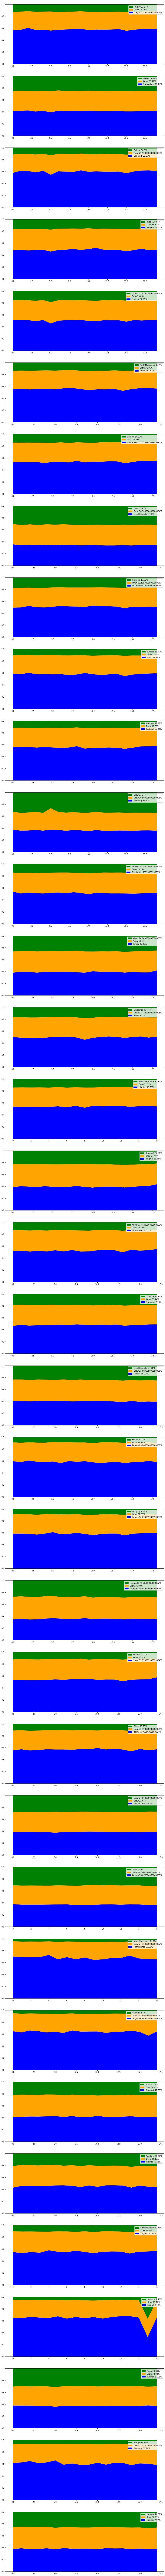

In [17]:
# plot all the matches in a plot displaying all odds 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,250))
# go match by match
for i, m in enumerate(oddsDf.match.unique()):
    df = oddsDf.loc[oddsDf.match == m]
    odds = df.iloc[:,-df.columns[-1]:]
    #convert odds to numeric
    for c in odds.columns: odds[c] = pd.to_numeric(odds[c])

    #normalize the odds by taking the odd and get % of odd
    odds_transf = odds.copy()
    odds_transf = odds.values[:,:] / sum(odds.values[:,:])

    # swap the odds from team 1 for 2nd team (given the lower the odd the more favorite the team is)
    tmp = odds_transf[0,:]
    odds.iloc[0,:] = odds_transf[-1,:]
    odds.iloc[-1,:] = tmp
    odds.iloc[1,:] = odds_transf[1,:]

    # remove empty odds
    for c in odds.columns:
        if sum(np.isnan(odds[c].values).astype(int)) == 3:
            odds = odds.drop(c, axis=1)

    # percentage from 1st , draw, 2nd Team
    x = list(range(len(odds.columns)))
    y1 = odds.iloc[0].values
    y2 = odds.iloc[1].values
    y3 = odds.iloc[-1].values

    ax1 = fig.add_subplot(36, 1 , i + 1)
    ax1.set_ylim(0,1)
    ax1.fill_between(x, y2 + y1, 1, color='green', label=m.split('VS')[1] +
                     f" {round(np.mean(y3),4)*100}%")
    ax1.fill_between(x, y1, y2 + y1, color='orange', label='Draw' + 
                     f" {round(np.mean(y2),4)*100}%")
    ax1.fill_between(x, 0, y1, color='blue', label=m.split('VS')[0]  + 
                     f" {round(np.mean(y1),4)*100}%")
    ax1.legend()
    ax1.set_title(m, fontweight ="bold", color='w')

plt.show()
    